In [ ]:
"""
Let's Check Zero one prediction problem


"""

In [2]:

from IPython.display import display, Markdown, Latex
h1 = lambda x: display(Markdown('# '+str(x)))
h3 = lambda x: display(Markdown('### '+str(x)))
h4 = lambda x: display(Markdown('#### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
h5 = lambda x: display(Markdown('##### '+ (str(x).replace(' ','&nbsp;') if str(x) else 'None')))
bl = lambda x: display(Markdown('##### <font color="blue"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd = lambda x: display(Markdown('##### <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
rd1 = lambda x: display(Markdown('# <font color="red"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
gra = lambda x: display(Markdown('##### <font color="gray"> %s </font>'%(str(x).replace(' ','&nbsp;') if str(x) else 'None')))
itc = lambda x: display(Markdown('***'+str(x.strip()) + '***' ))
pl = lambda: print('\n'+'#'*100 + '\n')
pl2 = lambda: print('\n'+'='*100 + '\n')
pls = lambda: print('\n'+'#'*50 +' Start '+'#'*50 + '\n')
pn = lambda x=5: print('\n'*x)


## Hand Made Neural Network

https://144.34.140.210:8579/notebooks/Git_Qiliang/ML_ANN_Gradiant_Decent/Backpropagation.ipynb

In [3]:
import pdb
bp = pdb.set_trace

import random
import uuid
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math


In [10]:
m =10
n  = 10
sigma = 0.2
mu = 0.5
sigma * np.random.randn(m,n) + mu


array([[ 0.59531983,  0.34771682,  0.4049222 ,  0.89544478,  0.2795419 ,
         0.61447951,  0.53620854,  0.60709239,  0.68826421,  0.55438787],
       [ 1.03310382,  0.45507754,  0.56992235,  0.37411996,  0.70404719,
         0.77797541,  0.47889382,  0.50189403,  0.54513131,  0.43722412],
       [ 0.46669368,  0.80617043,  0.59385018,  0.73085879,  0.79387737,
         0.33614437,  0.53550431,  0.54573274,  0.61493575,  0.27389935],
       [ 0.48079371,  0.38374955,  0.22135376,  0.62036372,  0.71183718,
         0.35884137,  0.45616619,  0.14159987,  0.41298849,  0.64382017],
       [ 0.62317798,  0.6695217 ,  0.06663257,  0.55982654,  0.40265043,
         0.8225215 ,  0.50903398,  0.22493706,  0.51917747,  0.59164166],
       [ 0.42113559,  0.26819464,  0.84369625,  0.64667635,  0.85837507,
         0.63264578,  0.40486754,  0.78456583,  0.69642029,  0.44264081],
       [ 0.83578249,  0.58533343,  0.57660237,  0.12691093,  0.42699705,
         0.20507268,  0.46659854,  0.67811836

array([[ 0.9178301 , -0.52645317,  1.43445454, ..., -1.84438132,
         0.35708369, -1.11821913],
       [-0.79293713, -0.15154908, -0.32639601, ..., -0.80257439,
        -0.51650888, -0.64861052],
       [-1.08801724,  0.10942418,  1.01294966, ..., -0.60165694,
        -1.1990059 ,  2.83354433],
       ...,
       [ 1.11596971,  0.67035546, -0.83310206, ...,  0.23945732,
         2.20529223,  1.16973062],
       [ 0.29524108,  1.73612246, -0.54730693, ..., -0.49703194,
         0.4382816 ,  1.69505143],
       [ 1.86267501,  1.3364684 ,  0.96856329, ..., -1.24752424,
         0.30422488,  1.35457626]])

In [205]:
# def relu(x):
#     if x>0:
#         return x
#     else:
#         return 0

# activation_func = np.vectorize(relu)  
# # activation_func = np.vectorize(lambda x: x) 
         
# def derivative(x):
#     if x>0:
#         return 1
#     else:
#         return 0
# #         return -1
# derivative_func = np.vectorize(derivative)   
    
# def relu(x):
#     if x>0:
#         return 1
#     else:
#         return 0

def relu(x):
    if x>0.5:
        if x<5:
            return x
        else:
            return 5
    else:
        return 0


activation_func = np.vectorize(relu)  
# activation_func = np.vectorize(lambda x: x) 
         
def derivative(x):
    if x>0.5:
        if x<5:
            return 1
        else:
            return 0
    else:
        return 0
#         return -1
#         return 1
derivative_func = np.vectorize(derivative)   
    
    
class Weight:
    def __init__(self,m,n):
        self.sigma = 0.2
        self.mu = 0.5
        self.m = m
        self.n = n
        self.val = self.sigma * np.random.randn(m,n) + self.mu
#         self.normalize()
        
    def normalize(self):
        self.val = self.val/self.val.sum()

class Layer:
    def __init__(self,n,id=None,output_ind=False):
        self.val = None
        self.id = id
        self.input_weight = None
        self.output_weight = None
        self.pre_layer = None
        self.next_layer = None
        self.n = n
        self.delta_weight = None
        self.output_ind = output_ind
        
        
    def full_connect(self,other):
        m = self.n
        n = other.n
        weight = Weight(m,n)
        self.output_weight = weight
        other.input_weight = weight
        
        self.next_layer = other
        other.pre_layer = self
    
    def stats(self):
        print("n:",self.n)
        if self.output_weight:
            print('Weight:',self.output_weight.val.shape)
        print()
            
    def pull_in(self,input_list):
        self.val = np.array([input_list,])
        self.val = self.val/self.val.sum()
            
    def forwarding(self):
#         print(self.id,'forwarding')
        val = self.val.dot(self.output_weight.val)
        try:
            if self.next_layer:
                if not self.next_layer.output_ind:
                    self.next_layer.val = activation_func(val)   
                else:
                    self.next_layer.val = val 
        except:
#             bp()
            raise
        
    def backwarding(self, error_term, learning_rate):
#         print(self.id,'backwarding')
        pre = self.pre_layer
        K1 = pre.output_weight.val
#         print(K1.shape)
        while(pre.pre_layer):
            pre = pre.pre_layer
            K1 = pre.output_weight.val.dot(K1)
            
        K1 = pre.val.dot(K1)
#         print('K1:',K1.shape)


        next_layer = self.next_layer
        if next_layer.output_weight:
            K2 = next_layer.output_weight.val
            while(next_layer.next_layer.output_weight):
                next_layer = next_layer.next_layer
                K2 = K2.dot(next_layer.output_weight.val) 
#             print("K2:",K2.shape)
        else:
            K2 = np.array([[1]])
                   
        derivative = K1.T.dot(K2.T)
#         bp()
    
        if not self.output_ind:
            K3 = derivative_func(self.val)
            derivative = derivative*K3.T
#         bp()
#         print("Derivative:",derivative.shape)
#         return derivative
    
        delta_weight = learning_rate*(-1)*(error_term)*derivative
#         bp()
#         print('delta_weight:',delta_weight)
        if type(self.delta_weight)!=type(None):
            self.delta_weight += delta_weight
        else:
            self.delta_weight = delta_weight
    
    def update_weights(self):
        if type(self.delta_weight)!=type(None):
            self.output_weight.val += self.delta_weight
            self.delta_weight = None
    
class Network:
    def __init__(self,input_layer,output_layer):
        self.input_layer = input_layer
        self.output_layer = output_layer
        self.learning_rate = 0.01
        
    def set_learning_rate(self,rate):
        self.learning_rate = rate
        
              
    def batch_forwarding(self):
        cur = self.input_layer
        while(cur.next_layer):
            cur.forwarding()
            cur = cur.next_layer
             
    def get_error_term(self,ground_truth_list):      
        error = self.output_layer.val-ground_truth_list
        return error
    
    def batch_backwarding(self, error_term):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.backwarding(error_term, self.learning_rate)
            cur = cur.next_layer
            
    def one_train(self,x,y):
        input_layer.pull_in(x)
        self.batch_forwarding()
        error_term = self.get_error_term(y)
        self.batch_backwarding(error_term)
        
        
    def batch_update_weights(self):
        cur = self.input_layer.next_layer
        while(cur and cur.output_weight):
            cur.update_weights() 
            cur = cur.next_layer

    def batch_train(self,X,Y,batch_size=20):
        i=0
        for i,(x,y) in enumerate(zip(X,Y)):
            self.one_train(x,y)
            if i%batch_size==0:
                self.batch_update_weights()
        self.batch_update_weights()
        
        
    def predict(self,x):
        input_layer.pull_in(x)
        self.batch_forwarding()
        return self.output_layer.val
    
    
#     def save(self,model_dir='./model.json'):
#         res = []
#         cur = self.input_layer
#         while(cur.output_weight):
#             res.append(cur)
         
#     def load(self,model_dir='./model.json')
#         pass



# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out')


# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)

# x = random.choices(range(100), k=10)

# print(x)
# y = np.array([[1]])

# nk = Network(input_layer,output_layer)
# nk.one_train(x,y)



In [206]:
"""
最简单和最直接的方法是什么

"""

'\n最简单和最直接的方法是什么\n\n'

In [207]:
# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out',output_ind=True)

# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)


# # Networks
# input_layer = Layer(10,'in')
# l1 = Layer(10,'l1')
# l2 = Layer(50,'l2')
# l2_5 = Layer(50,'l2.5')
# l3 = Layer(50,'l3')
# l4 = Layer(10,'l4')
# output_layer = Layer(1,'out',output_ind=True)

# input_layer.full_connect(l1)
# l1.full_connect(l2)
# l2.full_connect(l2_5)
# l2_5.full_connect(l3)
# l3.full_connect(l4)
# l4.full_connect(output_layer)

# Networks
input_layer = Layer(10,'in')
l1 = Layer(10,'l1')
l2 = Layer(50,'l2')
l3 = Layer(50,'l3')
l4 = Layer(10,'l4')
output_layer = Layer(1,'out',output_ind=True)

input_layer.full_connect(l1)
l1.full_connect(l2)
l2.full_connect(l3)
l3.full_connect(l4)
l4.full_connect(output_layer)




nk = Network(input_layer,output_layer)

In [4]:
vector = [2, 24, 31, 81, 2, 76, 57, 81, 79, 76]
vector = np.array(vector)
vector = vector/vector.sum()

X = []
Y = []
Y_percise = []
# for i in range(1):
for i in range(10):
# for i in range(100):
# for i in range(500):
# for i in range(1000):
# for i in range(10000):
# for i in range(100000):
# for i in range(1000000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector)
#     y = y_percise + (random.random()-0.5)*0.05
#     y = y_percise + (random.random()-0.5)*0.02
#     y = x.dot(vector) + (random.random()-0.5)*0.01
    y = x.dot(vector) + (random.random()-0.5)*0
    X.append(x)
    Y.append(y)
    Y_percise.append(y_percise)

In [6]:
x

array([0.0757315 , 0.04475043, 0.11531842, 0.16179002, 0.1222031 ,
       0.16179002, 0.04475043, 0.05851979, 0.0757315 , 0.1394148 ])

In [5]:
y_percise

0.1067091830696347

In [258]:
nk.set_learning_rate(0.0001)
# nk.set_learning_rate(0.001)
# nk.set_learning_rate(0.01)
# nk.set_learning_rate(0.1)
# nk.set_learning_rate(1)
# nk.set_learning_rate(2)
nk.batch_train(X,Y)

In [259]:
x = np.array(random.choices(range(100), k=10))
x = x/x.sum()
y_percise = x.dot(vector) 
# y_real = x.dot(vector) + (random.random()-0.5)*0.05
# y_real = x.dot(vector) + (random.random()-0.5)*0.02
y_real = x.dot(vector) + (random.random()-0.5)*0
y_predict = nk.predict(x)

print('x:',x)
print('y_percise:',y_percise)
print('y_real:',y_real)
print('y_predict:',y_predict)

# print('l1:\n',l1.val)
# print('l2:\n',l2.val)
# print('l3:\n',l3.val)
# print('l4:\n',l4.val)
# pl()

x: [0.12314225 0.06369427 0.12314225 0.08280255 0.05732484 0.09341826
 0.16772824 0.18046709 0.05095541 0.05732484]
y_percise: 0.10230709229620545
y_real: 0.10230709229620545
y_predict: [[0.]]


In [260]:
"""
变得特别大

或变成零

不稳定或容易训练失败

为啥会变成0和参数消失

0之后就没有机会了   这时候导数是1？  是多少？


不用relu试试   目前需要把数值有一定的限定就行了

量化的


"""

'\n变得特别大\n\n或变成零\n\n不稳定或容易训练失败\n\n为啥会变成0和参数消失\n\n0之后就没有机会了   这时候导数是1？  是多少？\n\n\n不用relu试试   目前需要把数值有一定的限定就行了\n\n\n'

In [261]:
input_layer.val

array([[0.12314225, 0.06369427, 0.12314225, 0.08280255, 0.05732484,
        0.09341826, 0.16772824, 0.18046709, 0.05095541, 0.05732484]])

In [262]:
l1.output_weight.val

array([[ 4.02834224e-01,  3.33353720e-01,  2.54890761e-01,
        -2.62602894e-01,  1.22932253e-01, -1.63021962e-01,
        -4.50442560e-02,  5.50998460e-01,  1.29191179e-01,
         4.90682199e-01, -3.67436950e-02,  4.69461067e-01,
         5.61374010e-03,  2.24114944e-01,  1.21700330e-01,
         3.27367814e-01,  9.03233187e-02,  1.63135860e-01,
         4.94374409e-01,  3.14854530e-01,  2.39901032e-01,
         5.70069157e-01,  2.88916267e-01, -1.33785445e-02,
         3.67274041e-01,  1.48648843e-01,  8.64505846e-02,
         3.74681879e-01,  7.88185857e-01,  5.87086365e-03,
         6.40711634e-01,  3.59577995e-01,  7.65879569e-02,
         1.82551959e-01,  4.40077426e-01,  2.29244654e-01,
         2.79335499e-01,  4.57779551e-01, -6.55935601e-02,
         8.99020815e-02,  4.55937605e-01,  5.92181314e-02,
        -6.44826568e-02, -3.59926526e-02, -2.33567883e-01,
         1.31015507e-01,  4.25831155e-01,  2.00335566e-02,
         2.48571019e-01,  4.81330726e-01],
       [ 4.50

In [263]:
l1.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [264]:
l2.output_weight.val

array([[0.12208856, 0.63711426, 0.66950074, ..., 0.0668857 , 0.57452191,
        0.25748155],
       [0.62778873, 0.22240301, 0.42633705, ..., 0.45687955, 0.29053786,
        0.31737288],
       [0.6103321 , 0.20926288, 0.57108072, ..., 0.35280446, 0.78693165,
        0.4288714 ],
       ...,
       [0.6670394 , 0.38901042, 0.15114515, ..., 0.04302878, 0.44394805,
        0.68806879],
       [0.73070342, 0.55095802, 0.50215498, ..., 0.23768461, 0.43057364,
        0.40306687],
       [0.29254968, 0.24367495, 0.70389071, ..., 0.06405968, 0.94712124,
        0.46098821]])

In [247]:
l2.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [248]:
l3.output_weight.val

array([[ 0.3587469 ,  0.71941479,  0.80003502,  0.4772288 ,  0.56052533,
         0.80540018,  0.46767711,  0.63612285,  0.41634441,  0.33300914],
       [ 0.41944059,  0.49837155,  0.19831115,  0.84873692,  0.48754382,
         0.53712266,  0.37701878,  0.50589203,  0.26234065,  0.32929047],
       [ 0.6707708 ,  0.42116532,  0.3779187 ,  0.60863658,  0.86480288,
         0.50871319,  0.5247761 ,  0.3876265 ,  0.45378589,  0.27725923],
       [ 0.50109224,  0.76204658,  0.98020551,  0.84280776,  0.45458099,
         0.45181864,  0.24572121,  0.53696017,  0.5535866 ,  0.60788594],
       [ 0.64016775,  0.68591974,  0.75398175,  0.51092758,  0.46958561,
         0.29310593,  0.47128521,  0.34417735,  0.70665782,  0.46223157],
       [ 0.728783  ,  0.52395841,  0.80759126,  0.74413943,  0.23569902,
         0.34638831,  0.41818006,  0.35113024,  0.40944681,  0.6503804 ],
       [ 0.43362941,  0.36320277,  0.47695976,  0.38003706,  0.34298304,
         0.70000799,  0.60208055,  0.43464191

In [249]:
l3.val

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [250]:
l4.output_weight.val

array([[0.54017624],
       [0.81448903],
       [0.29890825],
       [0.79210959],
       [0.69490164],
       [0.41194747],
       [0.71359377],
       [0.41686561],
       [0.41876886],
       [0.79685071]])

In [151]:
# vector

In [152]:
l4.val

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [153]:
output_layer.val

array([[5.40864796]])

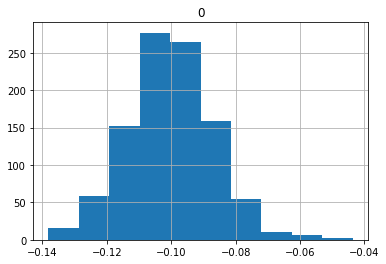

In [29]:
# Pred vs Real
res = []
for i in range(1000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector) 
    y_real = x.dot(vector) + (random.random()-0.5)*0.02
    y_predict = nk.predict(x)
    res.append(y_predict[0][0]-y_real)

#     print('x:',x)
#     print('y_percise:',y_percise)
#     print('y_real:',y_real)
#     print('y_predict:',y_predict)

#     print('l1:\n',l1.val)
#     print('l4:\n',l4.val)
#     pl()
res = pd.DataFrame(res)
res.hist()
plt.show()

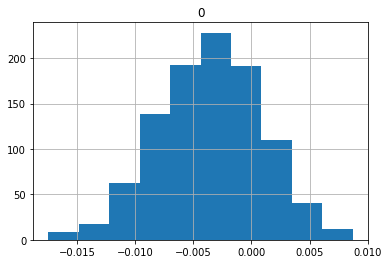

In [13]:
# Pred vs Percise
res = []
for i in range(1000):
    x = np.array(random.choices(range(100), k=10))
    x = x/x.sum()
    y_percise = x.dot(vector) 
    y_real = x.dot(vector) + (random.random()-0.5)*0.02
    y_predict = nk.predict(x)
    res.append(y_predict[0][0]-y_percise)

#     print('x:',x)
#     print('y_percise:',y_percise)
#     print('y_real:',y_real)
#     print('y_predict:',y_predict)

#     print('l1:\n',l1.val)
#     print('l4:\n',l4.val)
#     pl()
res = pd.DataFrame(res)
res.hist()
plt.show()

In [14]:
"""

当前设置非常容易出现参数消失


找一种函数可以自动的大变小，小变大

"""

'\n\n很精确的\n\nLooks Good\n'

## Notes

https://app.yinxiang.com/shard/s18/nl/18934792/e81511f4-0b23-48bc-b627-22416bbf9554

In [ ]:
"""


"""